# 1. Reading Data

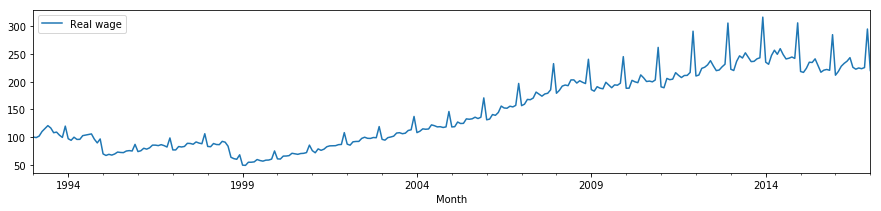

In [2]:
# start with this code
import pandas as pd
import numpy as np
from utils import qualityRMSE, qualityMedianAE
from utils import ExponentialSmoothing
%matplotlib inline

df1 = pd.read_csv('monthly-wage.csv', sep=';', decimal='.', index_col='Month', parse_dates=True, dayfirst=True)
df1.plot(figsize=(15,3))

In [3]:
df1[:5]

,Real wage
Month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47


There is a trend, since the values tend to grow over time. There is a seasonality, since the shape remains more or less the same, on the other hand, the level changes. 

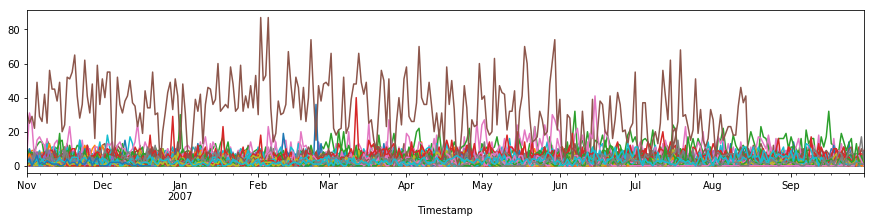

In [4]:
import matplotlib.pyplot as plt
df2 = pd.read_csv('TS_dep6.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
df2.plot(figsize=(15,3),legend = False)

In [5]:
df2[:5]

,item 1089,item 10960,item 1178,item 11827,item 1511,item 15934,item 16368,item 17248,item 18232,item 18291,...,item 89787,item 91285,item 91845,item 93627,item 93634,item 96260,item 96880,item 97952,item 99146,item 99147
Timestamp,,,,,,,,,,,,,,,,,,,,,
2006-11-01,1.0,2.0,0.0,3.0,3.0,0.0,0.0,2.0,3.0,4.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-02,2.0,2.0,4.0,0.0,0.0,1.0,0.0,5.0,1.0,6.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-03,4.0,4.0,1.0,3.0,3.0,1.0,0.0,5.0,6.0,7.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-04,0.0,3.0,2.0,1.0,1.0,0.0,2.0,1.0,1.0,7.0,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-11-05,4.0,8.0,1.0,2.0,1.0,1.0,2.0,6.0,5.0,6.0,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


item 1089      2.994012
item 10960     2.395210
item 1178     70.359281
item 11827     0.000000
item 1511     17.964072
dtype: float64

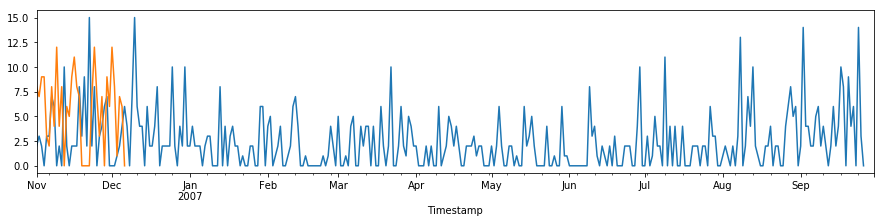

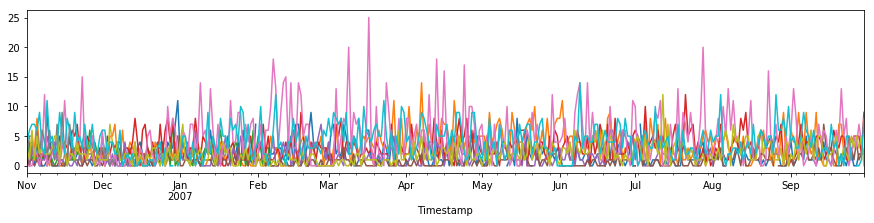

In [6]:
df2.iloc[:, 20:22].plot(figsize=(15,3),legend = False)
df2.iloc[:, :10].plot(figsize=(15,3),legend = False)
NaNs = (df2.isnull().sum()/len(df2))*100
NaNs[:5]

C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


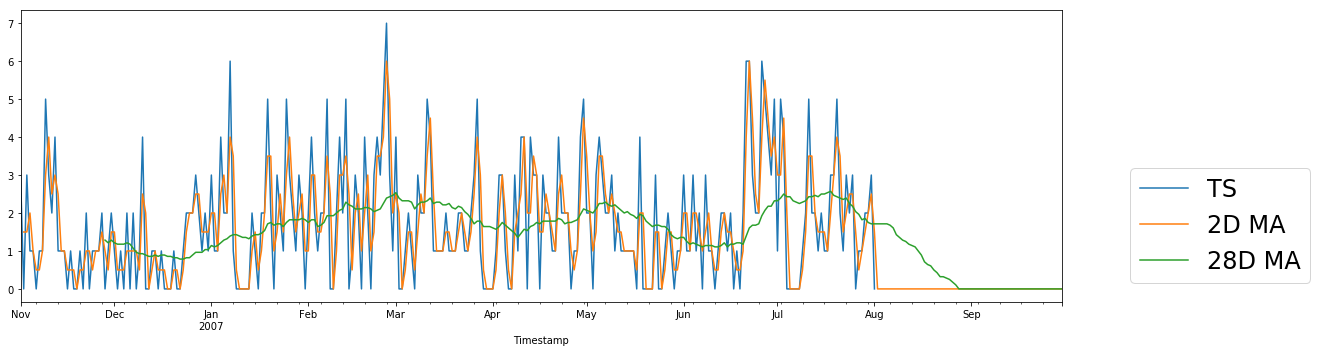

In [7]:
df2.ix['2006-11-01':'2007-09-30']['item 1511'].plot(label='TS')
df2['item 1511'].fillna(method='pad').rolling(2).mean().ix['2006-11-01':'2007-09-30'].plot(label='2D MA', figsize=(15,5))
df2['item 1511'].fillna(method='pad').rolling(28).mean().ix['2006-11-01':'2007-09-30'].plot(label='28D MA', figsize=(15,5))


plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()

This data consists of many time series, all except the first few are sparse and mostly consist of NaN values. I tried replacing the NaN values in sparse time series in different ways. There are no trends or seasonalities. There are a lot of changes in level.

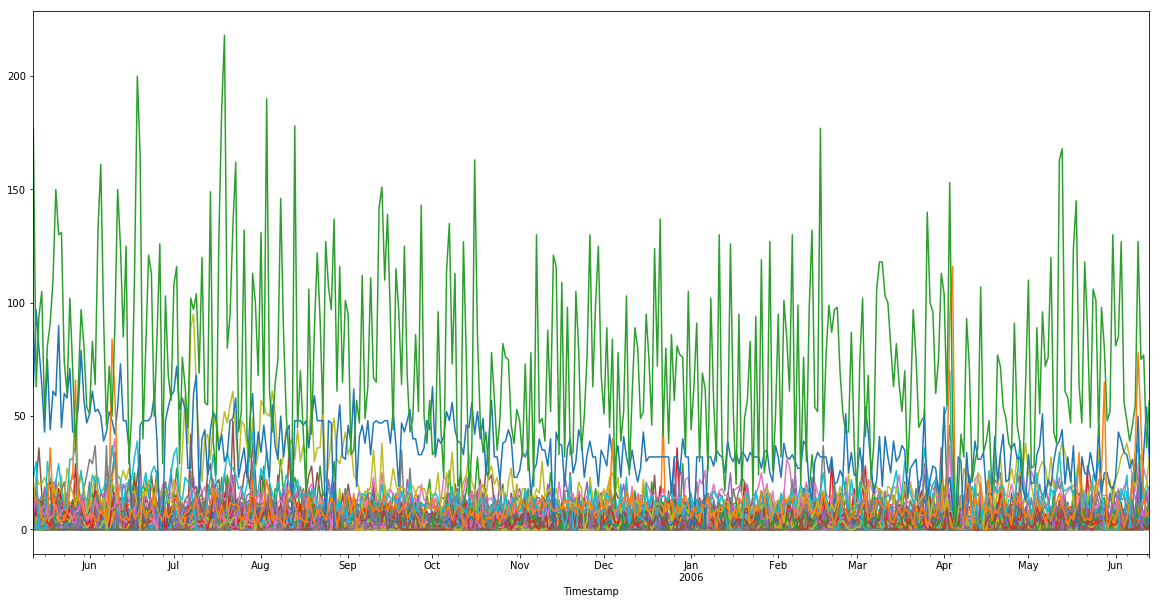

In [8]:
df3 = pd.read_csv('TS_dep36.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
df3.plot(figsize=(20,10),legend = False)

In [9]:
df3[:5]

,item 1758,item 40010,item 35731,item 96474,item 97519,item 75501,item 95519,item 93400,item 99826,item 57813,...,item 65825,item 31454,item 29014,item 49139,item 42190,item 8110,item 80718,item 29092,item 76501,item 32258
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-05-12,0,0,"2,484",0,0.0,"1,334",1,1,2.0,0,...,7,12,0,"66,324","32,864",12,23,63,14,177
2005-05-13,"0,878","0,983","2,632","1,12",1.0,"3,514",4,0,1.0,0,...,16,17,0,"69,952","34,024",24,30,97,13,63
2005-05-14,"0,332","1,346","2,016","0,302",1.0,"2,59",0,2,0.0,1,...,11,12,0,"35,366","31,626",20,0,80,12,94
2005-05-15,0,"0,556","0,882",0,4.0,"1,708",1,1,1.0,2,...,9,15,0,"37,898","43,726",20,0,64,6,105
2005-05-16,"0,438","0,671","0,314","1,486",2.0,"2,79",3,0,2.0,1,...,11,11,0,"49,566","34,548",23,0,43,4,51


C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


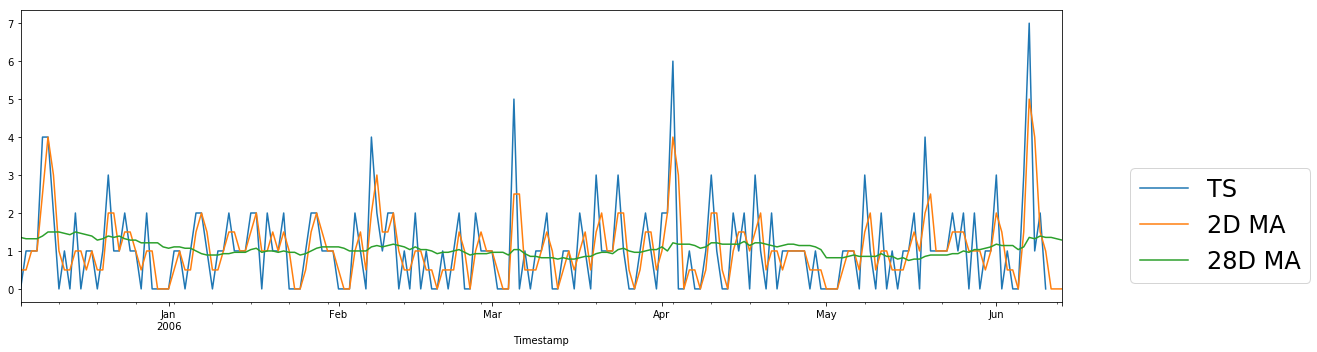

In [10]:
df3.ix['2005-12-05':'2006-06-13']['item 97519'].plot(label='TS')
df3['item 97519'].fillna(method='pad').rolling(2).mean().ix['2005-12-05':'2006-06-13'].plot(label='2D MA', figsize=(15,5))
df3['item 97519'].fillna(method='pad').rolling(28).mean().ix['2005-12-05':'2006-06-13'].plot(label='28D MA', figsize=(15,5))


plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()

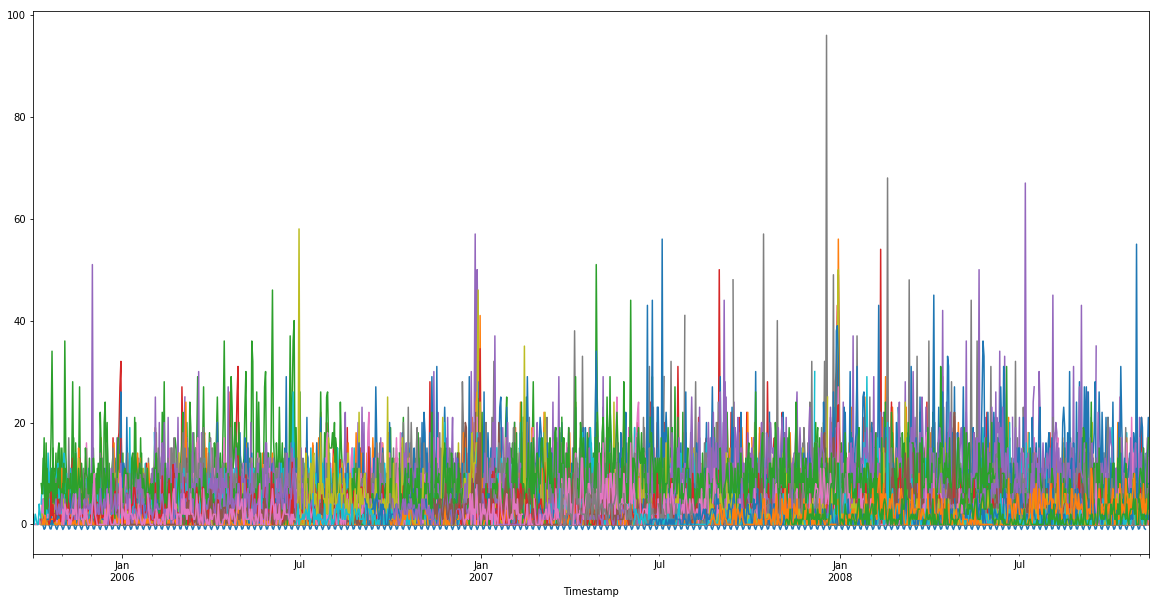

In [11]:
df4 = pd.read_csv('TS_dep42.csv', sep=';', decimal='.', index_col='Timestamp', parse_dates=True, dayfirst=True)
df4.plot(figsize=(20,10),legend = False)

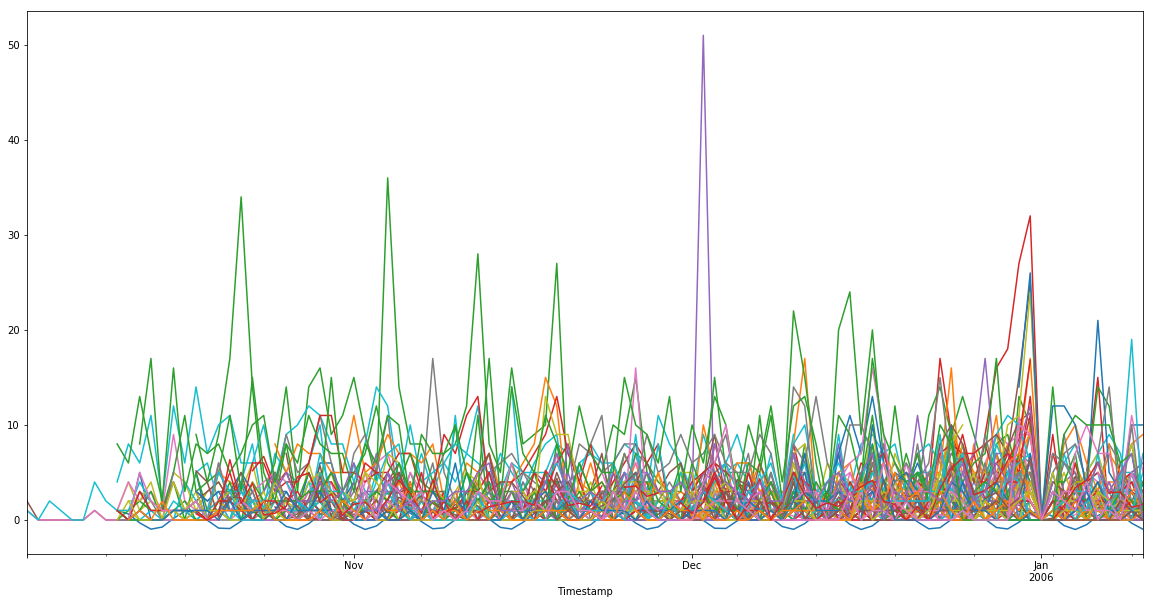

In [12]:
df4[:100].plot(figsize=(20,10),legend = False)

In [13]:
df4[:5]

,item 558,item 834,item 883,item 1311,item 1396,item 1647,item 1689,item 1761,item 1969,item 2036,...,item 77539,item 79279,item 80510,item 82356,item 87639,item 88121,item 89103,item 89977,item 95417,item 96668
Timestamp,,,,,,,,,,,,,,,,,,,,,
2005-10-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#the percentage of NaN values in differen time series in df4.
NaNs4 = (df4.isnull().sum()/len(df4))*100
NaNs4[:10]

item 558      1.057269
item 834     18.942731
item 883     70.484581
item 1311     5.462555
item 1396    20.000000
item 1647    22.290749
item 1689    23.524229
item 1761    31.365639
item 1969     2.819383
item 2036     5.814978
dtype: float64

C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app
C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  app.launch_new_instance()


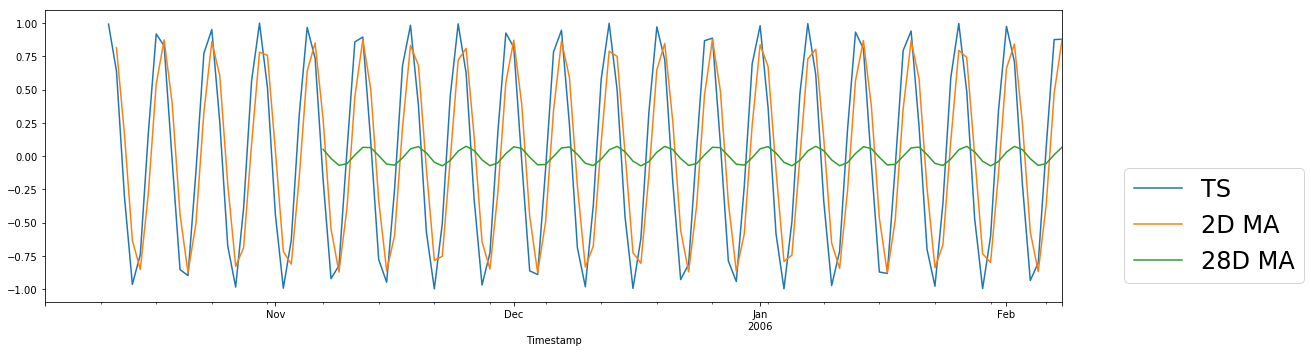

In [15]:
df4.ix['2005-10-03':'2006-02-08']['item 558'].plot(label='TS')
df4['item 558'].fillna(method='pad').rolling(2).mean().ix['2005-10-03':'2006-02-08'].plot(label='2D MA', figsize=(15,5))
df4['item 558'].fillna(method='pad').rolling(28).mean().ix['2005-10-03':'2006-02-08'].plot(label='28D MA', figsize=(15,5))


plt.legend(bbox_to_anchor=(1.25, .5), prop={'size':24})
plt.tight_layout()

# 2. Apply Simple ES to data with trend and Seasonality

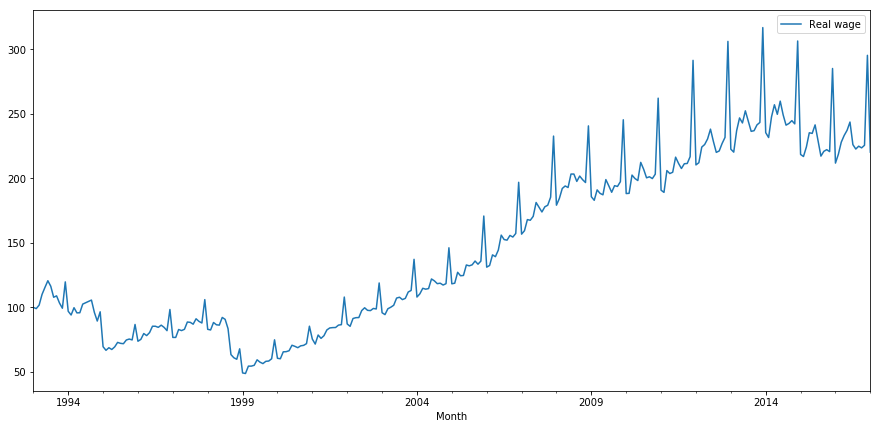

In [16]:
df1.plot(figsize=(15,7))

C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


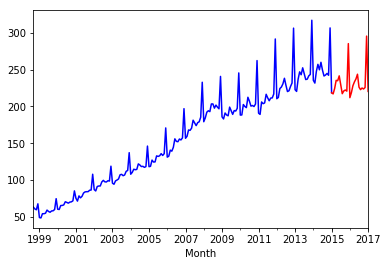

In [17]:
#spliting into train and test data
train_df1 = df1.ix['1998-09-01':'2015-01-01']
test_df1 = df1.ix['2015-01-01':]
ax = train_df1.plot(color='blue',legend = False)
test_df1.plot(ax=ax, color='red',legend = False)

In [18]:
#Loss function
def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

In [19]:
import math
def SimpleExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    FORECAST = [np.NaN]*(T+h)
    if alpha>1:
        w.warn('Alpha can not be more than 1')
        #alpha = 1
        return FORECAST
    if alpha<0:
        w.warn('Alpha can not be less than 0')
        #alpha = 0
        return FORECAST
    y = x[0]
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(y):
                y=x[cntr]
            y = y*(1-alpha) + alpha*x[cntr]
            #else do not nothing
        FORECAST[cntr+h] = y
    return FORECAST

In [20]:
# Forecasting delay
from datetime import datetime, timedelta
h = 1
start = train_df1.index[-1]+timedelta(1)
end = train_df1.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts1 = pd.DataFrame(index = train_df1.index.append(rng), columns = train_df1.columns)

In [21]:
def plot_mse(train, frc_ts):
    
    plt.figure(figsize=(15,15))
    alpha = 0.01
    l = int((1/0.01) -2)


    for i in range(l):
        
        Params ={'alpha':alpha}

        # forecast
        for cntr in train.columns:
            x = train[cntr]
            frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)

        plt.scatter(Params['alpha'],qualityMSE(train, frc_ts)[0])

        alpha += 0.01
    plt.show()

    
def min_mse(train, frc_ts):
    

    alpha = 0.01
    l = int((1/0.01) -2)
    mse_list = []
    alphas = []

    for i in range(l):
        
        Params ={'alpha':alpha}

        # forecast
        for cntr in train.columns:
            x = train[cntr]
            frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)

        mse_list.append(qualityMSE(train, frc_ts)[0].values)
        alphas.append(alpha)
        alpha += 0.01

    return alphas[mse_list.index(min(mse_list))]

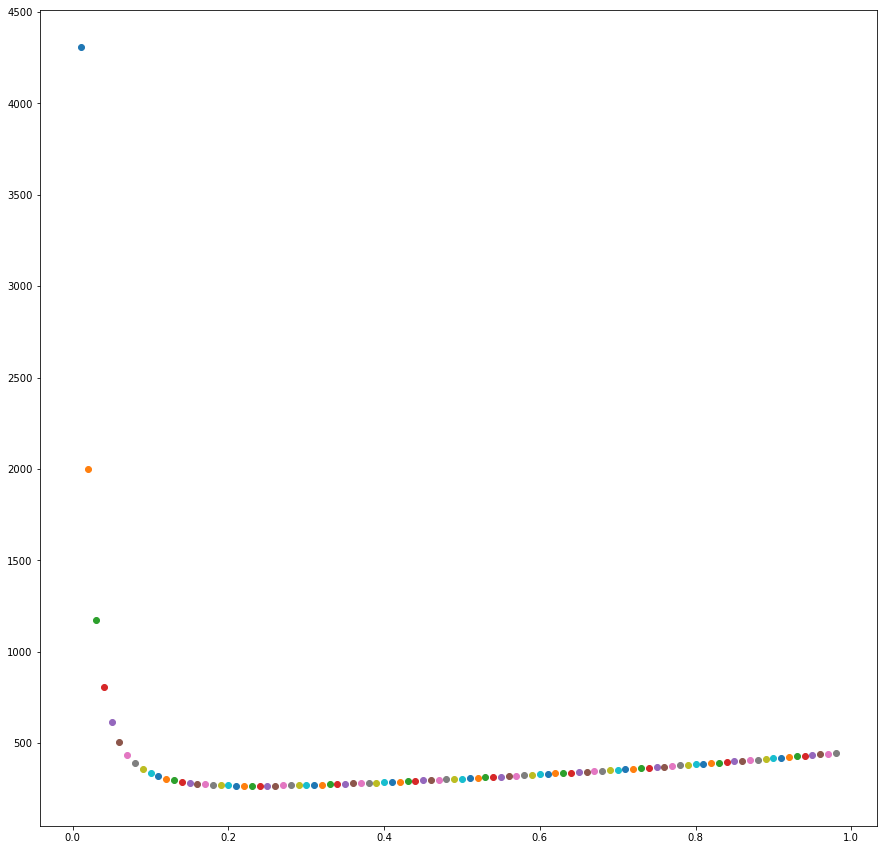

In [22]:
alpha_min = min_mse(train_df1, frc_ts1)
plot_mse(train_df1, frc_ts1)

In [23]:
alpha_min

0.23000000000000007

So, the best value for alpha is 0.23

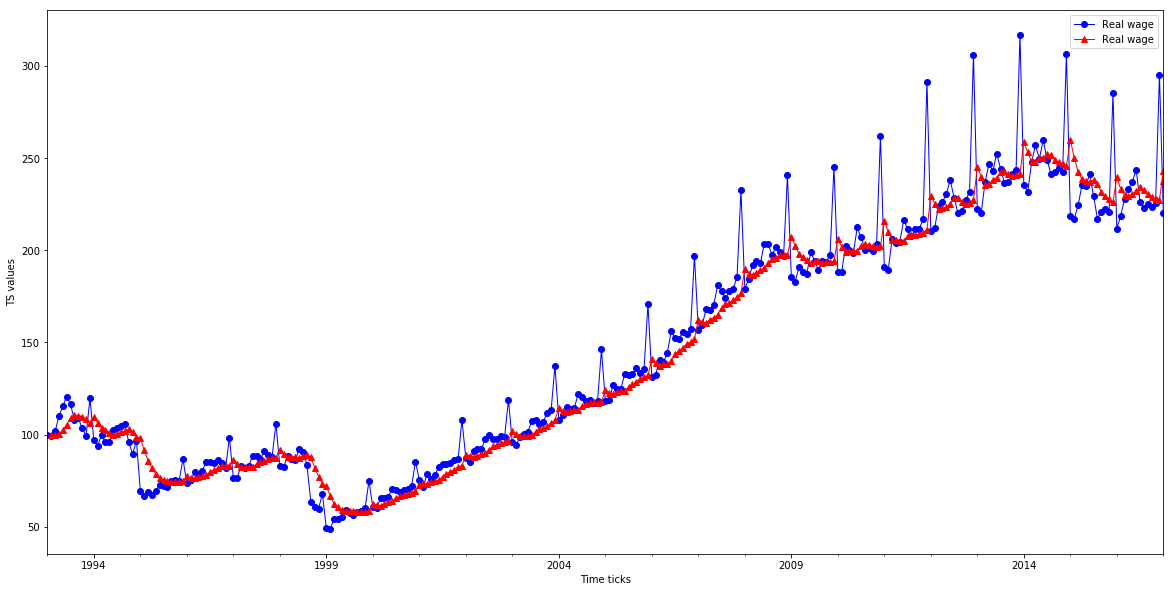

In [24]:
h = 1
start = df1.index[-1]+timedelta(1)
end = df1.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts = pd.DataFrame(index = df1.index.append(rng), columns = df1.columns)

Params ={'alpha':alpha_min}

# forecast
for cntr in df1.columns:
    x = df1[cntr]
    frc_ts[cntr] = SimpleExponentialSmoothing(x, h, Params)
            
frc_ts.columns = df1.columns
ts_num = 0 

df1[df1.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
frc_ts[frc_ts.columns[ts_num]].plot(style='r-^', figsize=(20,10), linewidth=1.0)


plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

I don't think that ES should be used for this model, it wasn't able to capture the outliers in our data. I believe that the main reason why is that the time series we are working with have both trend and seasonality, while the method is usually applied in cases when there is no trend and seasonality.

In [25]:
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualityMAPE

fcr = frc_ts['2016-02-01':'2017-01-01']
real = df1['2016-02-01':'2017-01-01']
ix = range(len(fcr.index))

loss, _ =  qualityMACAPE(real.iloc[ix], fcr.iloc[ix])
acc = 1 - loss
print('Accuracy =','{:0.3f}%'.format(acc.values[0]*100))

Accuracy = 94.464%


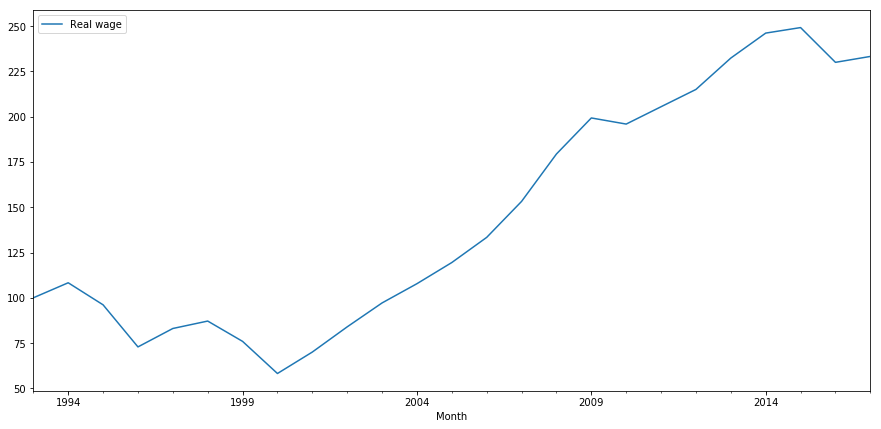

In [26]:
df1_agg = df1.copy()
df1_agg = df1_agg.resample('12M').mean()
df1_agg.plot(figsize=(15,7))

In this case our timeseries is stationary, without trends and seasonality. 

In [27]:
df1_agg

,Real wage
Month,
1993-01-31,100.000000
1994-01-31,108.302500
1995-01-31,96.124167
1996-01-31,72.886667
1997-01-31,83.059167
1998-01-31,87.160000
1999-01-31,75.945000
2000-01-31,58.206667
2001-01-31,70.055000


C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


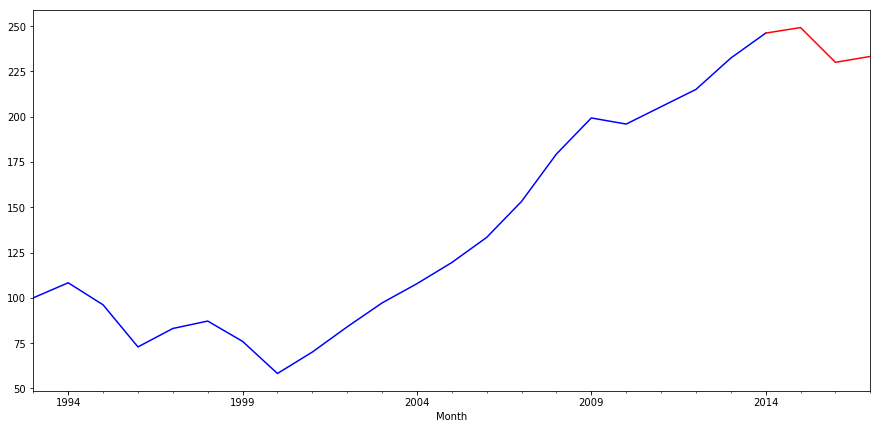

In [28]:
#spliting into train and test data
train_df1_agg = df1_agg.ix['1993-01-31':'2014-01-31']
test_df1_agg = df1_agg.ix['2014-01-31':]
ax = train_df1_agg.plot(color='blue',legend = False, figsize = (15,7))
test_df1_agg.plot(ax=ax, color='red',legend = False, figsize = (15,7))

In [29]:
# Forecasting delay
from datetime import datetime, timedelta
h = 1
start = train_df1_agg.index[-1]+timedelta(1)
end = train_df1_agg.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts2 = pd.DataFrame(index = train_df1_agg.index.append(rng), columns = train_df1_agg.columns)

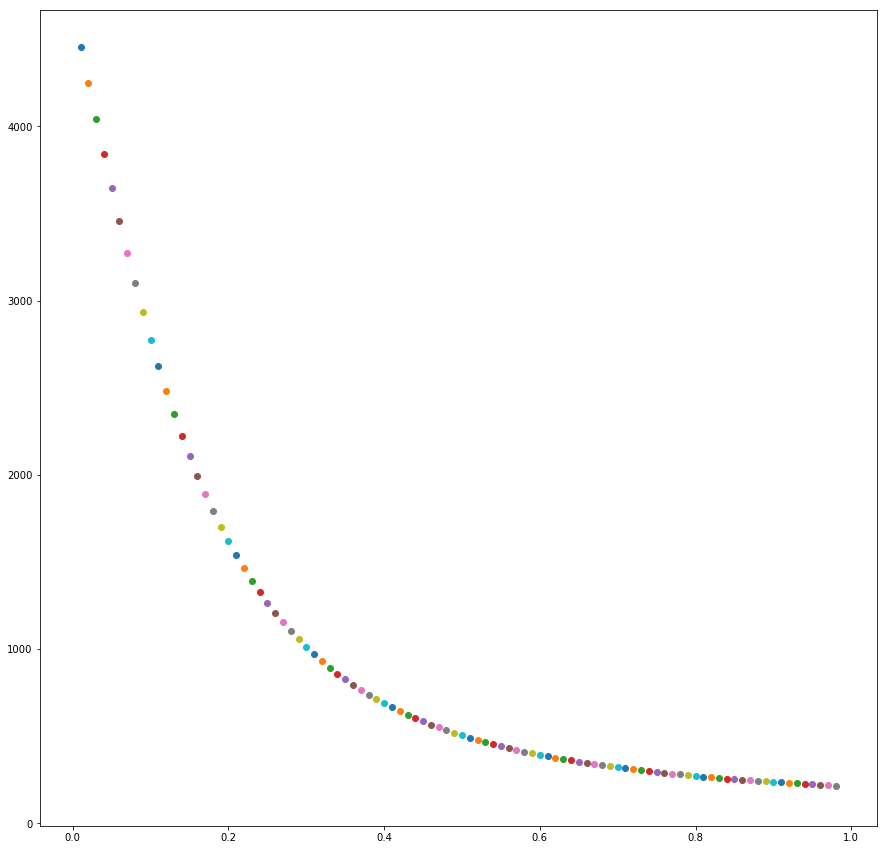

In [30]:
alpha_min = min_mse(train_df1_agg, frc_ts2)
plot_mse(train_df1_agg, frc_ts2)

In [31]:
alpha_min

0.9800000000000006

It turns out that in this case the optiman value of alpha is close to 1. :)

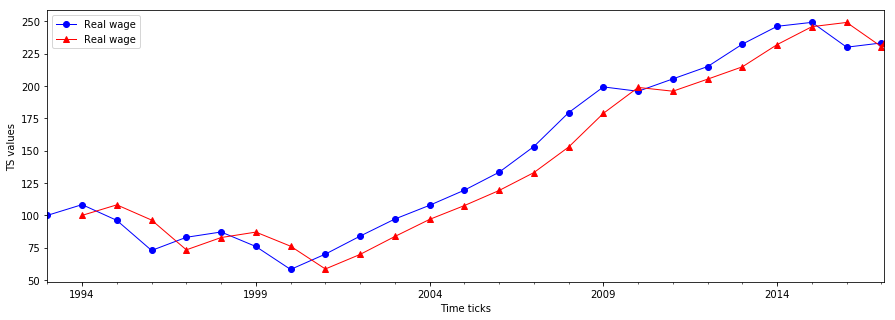

In [32]:
h = 1
start = df1_agg.index[-1]+timedelta(1)
end = df1_agg.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_ts3 = pd.DataFrame(index = df1_agg.index.append(rng), columns = df1_agg.columns)

Params ={'alpha':alpha_min}

# forecast
for cntr in df1_agg.columns:
    x = df1_agg[cntr]
    frc_ts3[cntr] = SimpleExponentialSmoothing(x, h, Params)
            
frc_ts3.columns = df1_agg.columns
ts_num = 0 

df1_agg[df1_agg.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
frc_ts3[frc_ts3.columns[ts_num]].plot(style='r-^', figsize=(15,5), linewidth=1.0)


plt.xlabel("Time ticks")
plt.ylabel("TS values")
plt.legend()

In [33]:
df1_agg.index.name = 'Month'
frc_ts3.index.name = 'Month'
frc_ts3 = frc_ts3[:-1]
frc_ts3 = frc_ts3.fillna(frc_ts3.mean())

In [34]:
ix = range(len(frc_ts3.index))

loss, _ =  qualityMACAPE(df1_agg.iloc[ix], frc_ts3.iloc[ix])
acc = 1 - loss
print('Accuracy =','{:0.3f}%'.format(acc.values[0]*100))

Accuracy = 88.030%


# 3. Winters model for Additive Seasonality

In [167]:
def WintersExponentialSmoothing(x, h, Params):
    x = np.array(x)
    T = len(x)
    alpha = Params['alpha']
    gamma = Params['gamma']
    p = Params['seasonality']
    
    FORECAST = [np.NaN]*(T+h) ## put foreast of the model here
    
    l = np.mean(x[:p]) # initialize ts level
    s = x[:p]-l # initialize seasonality values (it must be vector of length p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= np.mean(x[cntr:cntr+p]) # initialize 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= x[cntr] - l # initialize 
            old_l = l
            l = (1-alpha)*l + alpha*(x[cntr]-s[cntr % p])  # recurrent smoothing of level 
            s[cntr % p] = (1-gamma)*s[cntr % p] + gamma*(x[cntr] - old_l) # recurrent smoothing of seasonality
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST


In [71]:
h = 1
start = train_df1.index[-1]+timedelta(1)
end = train_df1.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_df1_w = pd.DataFrame(index = train_df1.index.append(rng), columns = train_df1.columns)

In [107]:
ALPHA = list(np.linspace(start=0, stop=1, num=20))
GAMMA = list(np.linspace(start=0, stop=1, num=20))
Seasonality = 12

loss_w = np.zeros(shape=(len(ALPHA),len(GAMMA)))


for alpha in ALPHA:
    for gamma in GAMMA:
 
        Params = {}
        Params['alpha']=alpha
        Params['gamma']=gamma
        Params['seasonality'] = Seasonality
        for cntr in train_df1.columns:
            frc_df1_w[cntr] = WintersExponentialSmoothing(train_df1[cntr], h, Params)

        loss,_ = qualityMSE(train_df1.iloc[ix], frc_df1_w.iloc[ix])

        loss_w[ALPHA.index(alpha)][GAMMA.index(gamma)] = loss
      
        
alpha_m = np.where(loss_w == np.min(loss_w))[0][0]
gamma_m = np.where(loss_w == np.min(loss_w))[1][0]
alpha_min = ALPHA[alpha_m]
gamma_min = GAMMA[gamma_m]

In [108]:
print(alpha_min)
print(gamma_min)
print(np.min(loss_w))

1.0
1.0
4.46805416667


So, the optimal values are alpha = 1 and gamma = 1, the loss obtained in this case is loss = 4.47

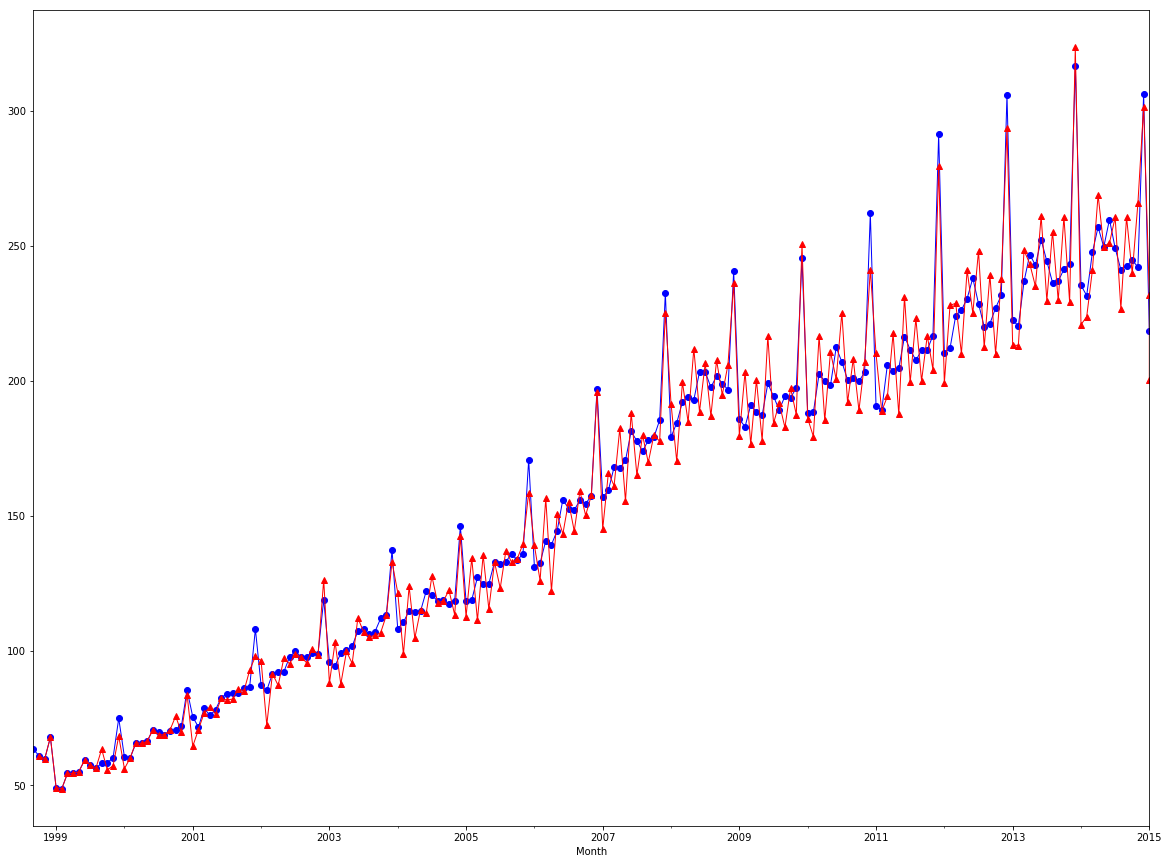

In [115]:
Params = {}
Params['alpha']=alpha_min
Params['gamma']=gamma_min
Params['seasonality'] = 12
for cntr in train_df1.columns:
    frc_df1_w[cntr] = WintersExponentialSmoothing(train_df1[cntr], h, Params)
    
#frc_df1_w.plot()
train_df1[train_df1.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
frc_df1_w[frc_df1_w.columns[ts_num]].plot(style='r-^', figsize=(20,15), linewidth=1.0)

In [118]:
ix = range(len(frc_df1_w.index))

loss, _ =  qualityMACAPE(df1.iloc[ix], frc_df1_w.iloc[ix])
acc = 1 - loss
print('Accuracy =','{:0.3f}%'.format(acc.values[0]*100))

Accuracy = 95.658%


We have obtained better results than in case of simple exponential smoothing. I guess it may give better resulta on data without any trend.

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)

In [128]:
def TheilWageModel(x, h, Params):
    x = np.array(x)
    T = len(x)
    alpha = Params['alpha']
    betta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality']

    FORECAST = [np.NaN]*(T+h)

    l = np.mean(x[:p]) #level           
    t = np.mean(x[p:2*p] - x[:p])/p #trend
    s = x[:p]-l #seasonality                 

    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.mean(x[cntr:cntr+p]) 
            if math.isnan(s[cntr % p]):
                s[t % p] = x[cntr] - l 
            old_l = l      
            old_t = t
            l = alpha*(x[cntr]-s[cntr % p]) + (1-alpha)*(l+t)
            t = betta*(l - old_l) + (1-betta)*t
            s[cntr % p] = gamma*(x[cntr] - old_l - old_t) + (1-gamma)*s[cntr % p] 
            
        FORECAST[cntr+h] = l + h*t + s[(cntr+h) % p]
    return FORECAST

In [130]:
h = 1
start = train_df1.index[-1]+timedelta(1)
end = train_df1.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_df1_th = pd.DataFrame(index = train_df1.index.append(rng), columns = train_df1.columns)

In [147]:
ALPHA = list(np.linspace(start=0, stop=1, num=20))
BETA = list(np.linspace(start=0, stop=1, num=20))
GAMMA = list(np.linspace(start=0, stop=1, num=20))
Seasonality = 12
ix = range(len(train_df1.index))

loss_th = np.zeros(shape=(len(ALPHA),len(BETA),len(GAMMA)))


for alpha in ALPHA:
    for beta in BETA:
        for gamma in GAMMA:
            Params = {}
            Params['alpha']=alpha
            Params['beta']=beta
            Params['gamma']=gamma
            Params['seasonality'] = Seasonality
            for cntr in train_df1.columns:
                frc_df1_th[cntr] = TheilWageModel(train_df1[cntr], h, Params)

            loss,_ = qualityMSE(train_df1.iloc[ix], frc_df1_th.iloc[ix])

            loss_th[ALPHA.index(alpha)][BETA.index(beta)][GAMMA.index(gamma)] = loss
      
        
alpha_m = np.where(loss_th == np.min(loss_th))[0][0]
beta_m = np.where(loss_th == np.min(loss_th))[1][0]
gamma_m = np.where(loss_th == np.min(loss_th))[2][0]
alpha_min = ALPHA[alpha_m]
beta_min = BETA[beta_m]
gamma_min = GAMMA[gamma_m]

In [148]:
print(alpha_min)
print(beta_min)
print(gamma_min)
print(np.min(loss_th))

0.789473684211
0.0
0.631578947368
15.4090798644


So, the optimal values are alpha = 0.79, beta = 0.0 and gamma = 0.63, the loss obtained in this case is loss = 15.4

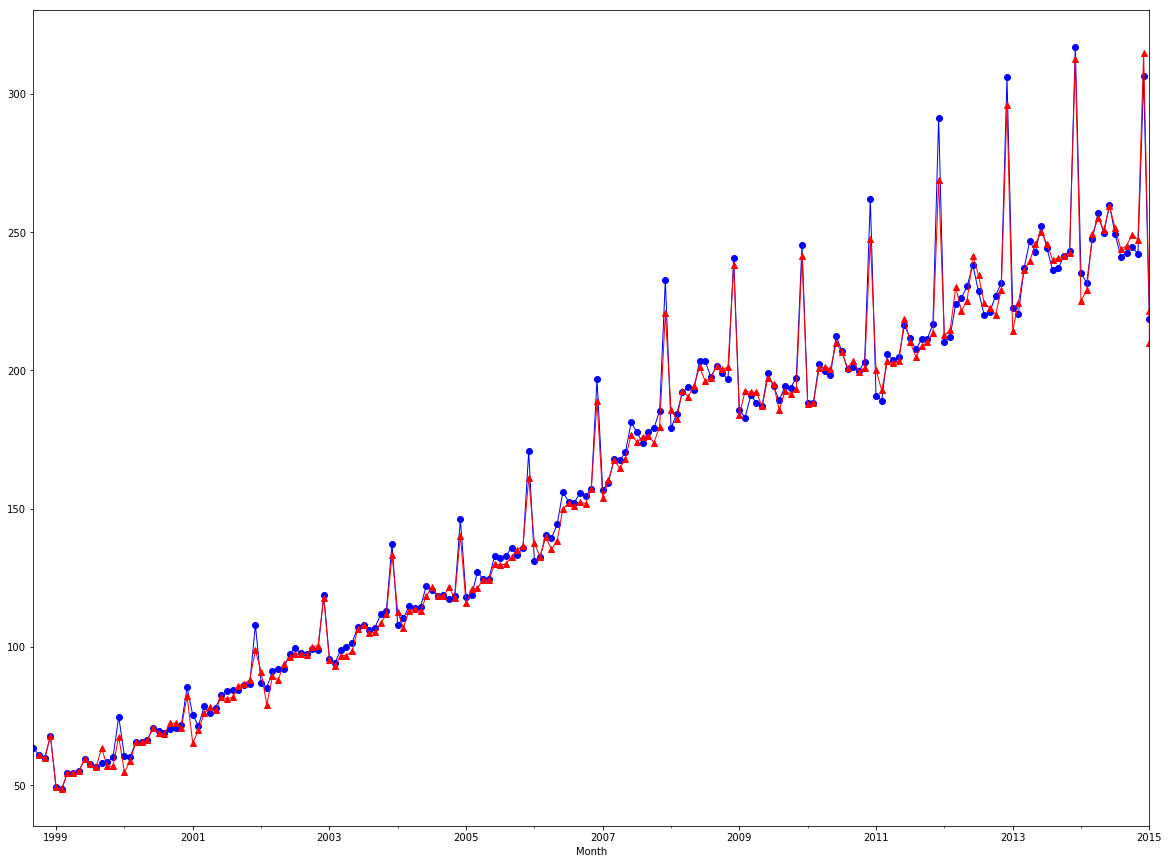

In [150]:
Params = {}
Params['alpha']=alpha_min
Params['beta']=beta_min
Params['gamma']=gamma_min
Params['seasonality'] = 12
for cntr in train_df1.columns:
    frc_df1_th[cntr] = WintersExponentialSmoothing(train_df1[cntr], h, Params)
    
train_df1[train_df1.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
frc_df1_th[frc_df1_th.columns[ts_num]].plot(style='r-^', figsize=(20,15), linewidth=1.0)

In [152]:
ix = range(len(frc_df1_th.index))

loss, _ =  qualityMACAPE(df1.iloc[ix], frc_df1_th.iloc[ix])
acc = 1 - loss
print('Accuracy =','{:0.3f}%'.format(acc.values[0]*100))

Accuracy = 97.914%


Even a better accuracy in this case.

# 5. Non-additive model of ES (25%)

In [156]:
def ESM(x, h, Params):
    x = np.array(x)
    T = len(x)
    alpha = Params['alpha']
    betta = Params['beta']
    gamma = Params['gamma']
    phi = Params['phi']
    p = Params['seasonality']

    FORECAST = [np.NaN]*(T+h)

    
   
    l = np.mean(x[:p])                
    b = np.mean(x[p:2*p] - x[:p])/p 
    s = x[:p]/l                          
    phi_h = 0
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = np.mean(x[cntr:cntr+p]) 
            if math.isnan(s[cntr % p]):
                s[cntr % p] = x[cntr] - l 
            old_l = l
            old_b = b
            l = alpha*(x[cntr]/s[cntr % p]) + (1-alpha)*(l+phi*b)
            b = betta*(l - old_l) + (1-betta)*phi*b
            s[cntr % p] = gamma*(x[cntr]/(old_l + phi*old_b)) + (1-gamma)*s[cntr % p] 
          
        for i in range(h):
            phi_h = phi_h + phi**i
        phi_h = phi_h*phi
        FORECAST[cntr+h] = (l + phi_h*b)*s[(cntr+h) % p]
    return FORECAST

In [154]:
h = 1
start = train_df1.index[-1]+timedelta(1)
end = train_df1.index[-1]+timedelta(h)
rng = pd.date_range(start, end)
frc_df1_esm = pd.DataFrame(index = train_df1.index.append(rng), columns = train_df1.columns)

In [163]:
ALPHA = list(np.linspace(start=0, stop=1, num=15))
BETA = list(np.linspace(start=0, stop=1, num=15))
GAMMA = list(np.linspace(start=0, stop=1, num=15))
PHI = list(np.linspace(start=0, stop=1, num=15))
Seasonality = 12
ix = range(len(train_df1.index))

loss_esm = np.zeros(shape=(len(ALPHA),len(BETA),len(GAMMA),len(PHI)))


for alpha in ALPHA:
    for beta in BETA:
        for gamma in GAMMA:
            for phi in PHI:
                Params = {}
                Params['alpha']=alpha
                Params['beta']=beta
                Params['gamma']=gamma
                Params['phi']=phi
                Params['seasonality'] = Seasonality
                for cntr in train_df1.columns:
                    frc_df1_esm[cntr] = ESM(train_df1[cntr], h, Params)

                loss,_ = qualityMSE(train_df1.iloc[ix], frc_df1_esm.iloc[ix])

                loss_esm[ALPHA.index(alpha)][BETA.index(beta)][GAMMA.index(gamma)][PHI.index(phi)] = loss
      
        
alpha_m = np.where(loss_esm == np.min(loss_esm))[0][0]
beta_m = np.where(loss_esm == np.min(loss_esm))[1][0]
gamma_m = np.where(loss_esm == np.min(loss_esm))[2][0]
phi_m = np.where(loss_esm == np.min(loss_esm))[3][0]
alpha_min = ALPHA[alpha_m]
beta_min = BETA[beta_m]
gamma_min = GAMMA[gamma_m]
phi_min = PHI[phi_m]

In [164]:
print(alpha_min)
print(beta_min)
print(gamma_min)
print(phi_min)
print(np.min(loss_esm))

0.5
0.0714285714286
0.428571428571
0.785714285714
15.6891651685


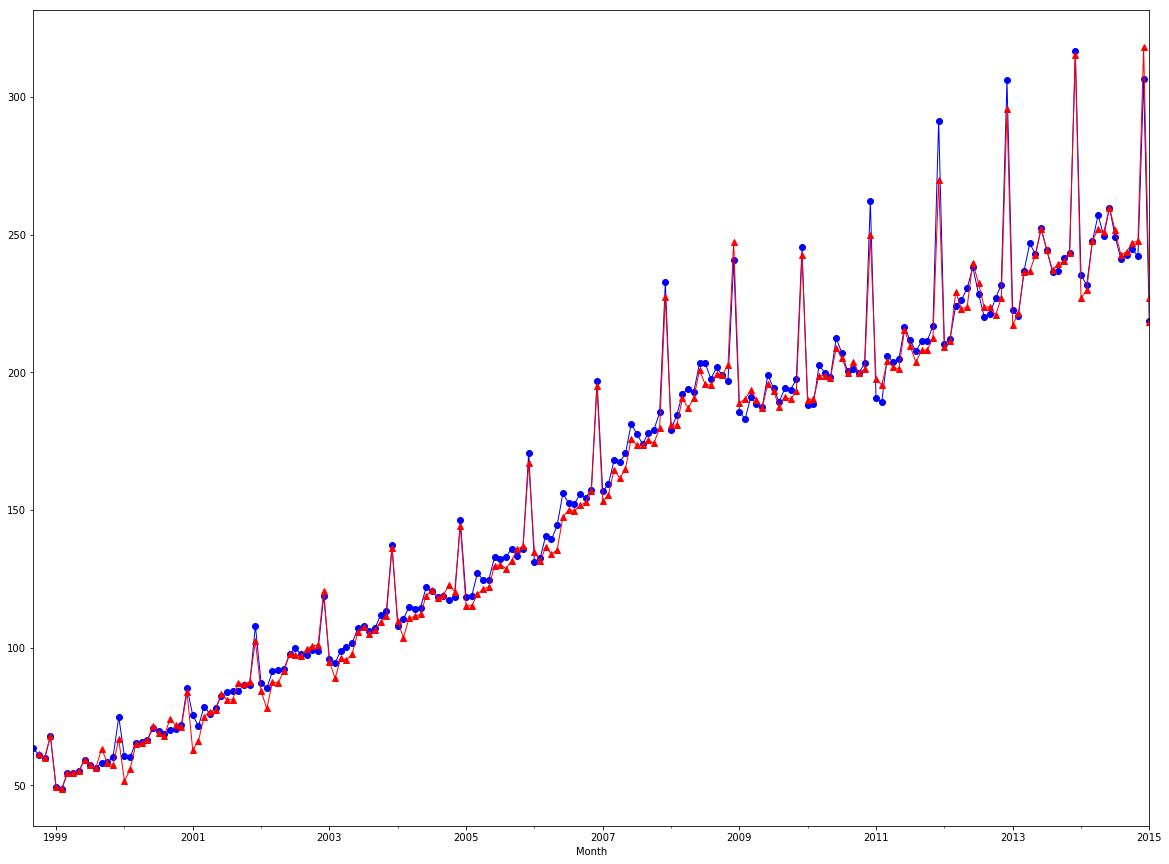

In [165]:
Params = {}
Params['alpha']=alpha_min
Params['beta']=beta_min
Params['gamma']=gamma_min
Params['phi']=gamma_min
Params['seasonality'] = 12
for cntr in train_df1.columns:
    frc_df1_esm[cntr] = ESM(train_df1[cntr], h, Params)
    
train_df1[train_df1.columns[ts_num]].plot(style='b', linewidth=1.0, marker='o')
frc_df1_esm[frc_df1_esm.columns[ts_num]].plot(style='r-^', figsize=(20,15), linewidth=1.0)

In [166]:
ix = range(len(frc_df1_esm.index))

loss, _ =  qualityMACAPE(df1.iloc[ix], frc_df1_esm.iloc[ix])
acc = 1 - loss
print('Accuracy =','{:0.3f}%'.format(acc.values[0]*100))

Accuracy = 97.470%
